Last Updated 08-08-2017

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#GroupBy:-split-apply-combine" data-toc-modified-id="GroupBy:-split-apply-combine-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>GroupBy: split-apply-combine</a></div><div class="lev2 toc-item"><a href="#Groupby-processing:-split" data-toc-modified-id="Groupby-processing:-split-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Groupby processing: split</a></div><div class="lev2 toc-item"><a href="#Groupby-processing:-apply" data-toc-modified-id="Groupby-processing:-apply-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Groupby processing: apply</a></div>

# GroupBy: split-apply-combine


We often want to build a time series of change from spatially distributed data. For example, suppose we need to plot a time series of the global average air temperature across the entire period of our climate data record. 

xarray supports “group by” operations with the same API as pandas to implement the split-apply-combine strategy:

- Split your data into multiple independent groups.
- Apply some function to each group.
- Combine your groups back into a single data object.


In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('seaborn')
matplotlib.rcParams['figure.figsize'] = (12, 15)
import numpy as np
import pandas as pd
import seaborn as sns
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf
import xarray as xr
from cartopy import crs

hv.notebook_extension()

In [2]:
dset = xr.open_dataset('/home/abanihi/Documents/climate-data/global-hourly-0.5-degree-Air-Temperature-ds193.0/MERRA_T2M_2000-01.nc')

In [3]:
dset

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 744)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01T00:29:59.971200 ...
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 -87.75 -87.25 -86.75 ...
  * lon      (lon) float32 -179.75 -179.25 -178.75 -178.25 -177.75 -177.25 ...
Data variables:
    T2M      (time, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...
Attributes:
    source_file:  This product is developed based on MERRA hourly reanalysis ...
    institution:  A. Wang is at the Institute of Atmospheric Physics in Beiji...
    references:    Wang and Zeng, 2013, J. Climate, Volume: 26, Pages:7676-76...

##  Groupby processing: split
We can groupby the name of a variable or coordinate. Either returns an xarray groupby object:

dset[‘T2M’].groupby(‘time’)

## Groupby processing: apply
Next we apply a function across the groupings set up in the xarray groupby process. When providing a single dimension to the groupby command, apply processes the function across the remaining dimensions. We could do the following:

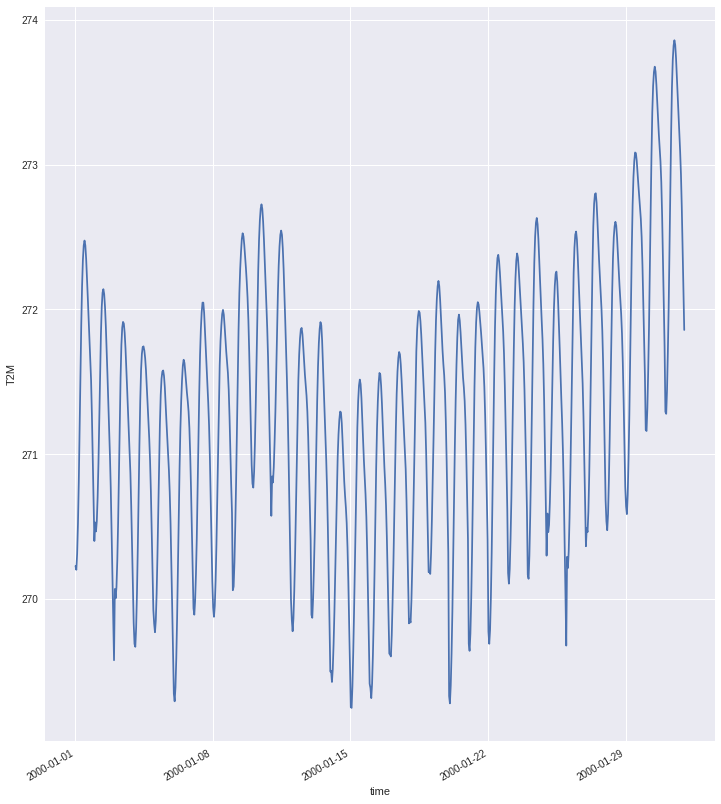

In [4]:
def mean(x):
    return x.mean()

dset['T2M'].groupby('time').apply(mean).plot()

However, groupby objects have convenient shortcuts:

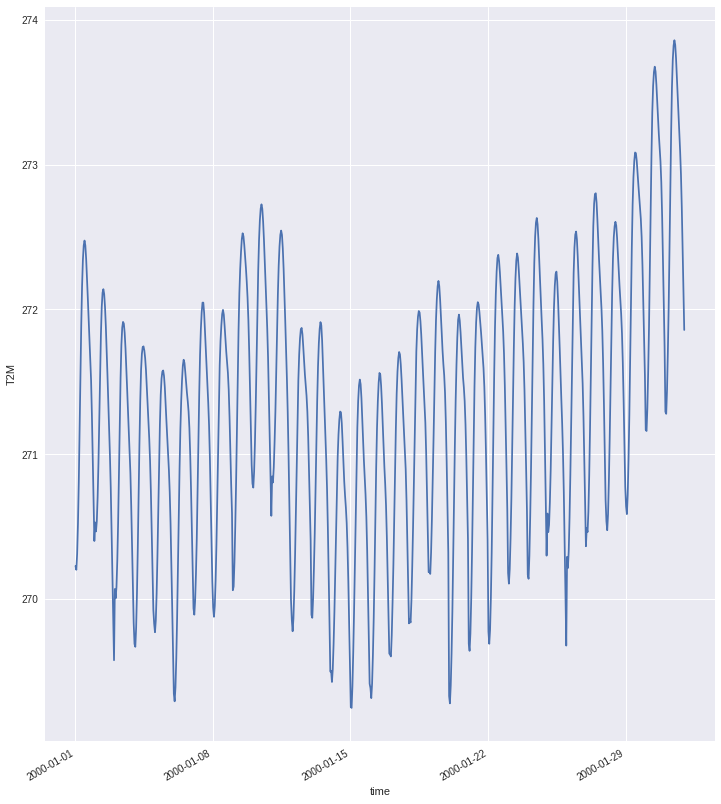

In [6]:
dset['T2M'].groupby('time').mean().plot()

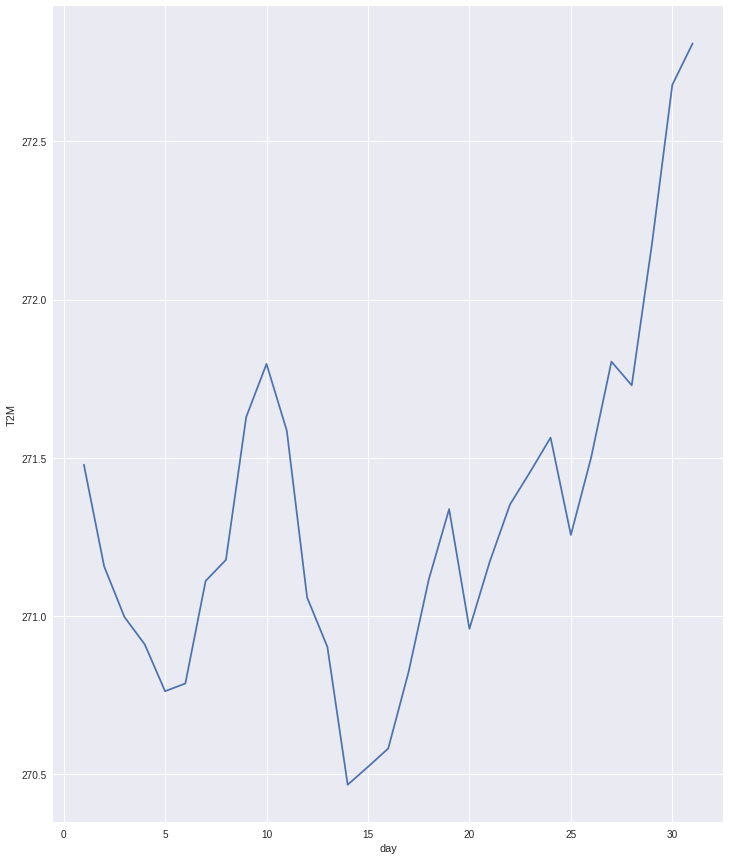

In [9]:
dset['T2M'].groupby('time.day').mean().plot()

As a final example, here’s a very interesting way to explore seasonal variations in temperature data using xarray:



```python
ds_by_season = dset['t2m'].groupby('time.season').mean('time')
t2m_range = abs(ds_by_season.sel(season='JJA') - ds_by_season.sel(season='DJF'))
t2m_range.plot()
```